In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(platetools)))
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer)))
# load theme
source("../../utils/r_themes.r")

In [2]:
# set path to data
data_path <- file.path("..","..","data","platemap_6hr_4ch.csv")
figure_path <- file.path("..","figures")
# make sure the figure path exists
dir.create(figure_path, showWarnings = FALSE)
# figure file name
figure_file <- file.path(figure_path, "platemap_6hr_4ch.png")
# read in data
data <- read.csv(data_path)
head(data)

,plate,well,compound,dose,control
,<int>,<chr>,<chr>,<dbl>,<chr>
1,1,E-10,Staurosporine,78.13,test
2,1,C-06,Staurosporine,4.88,test
3,1,E-02,Staurosporine,0.00,negative
4,1,C-05,Staurosporine,2.44,test
5,1,C-11,Staurosporine,156.25,test
6,1,D-05,Staurosporine,2.44,test


In [3]:
# format the well column to remove "-"
data$well <- gsub("-", "", data$well)
# make dose categorical
data$dose <- as.factor(data$dose)
# set order of dose levels
unique(data$dose)
data$dose <- factor(data$dose, levels = c(
    "0",
    "0.61",
    "1.22",
    "2.44",
    "4.88",
    "9.77",
    "19.53",
    "39.06",
    "78.13",
    "156.25"
))    



[1] 78.13  4.88   0      2.44   156.25 0.61   1.22   19.53  39.06  9.77  
Levels: 0 0.61 1.22 2.44 4.88 9.77 19.53 39.06 78.13 156.25

Warning message:
“Warning: Your well label count ( 30 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


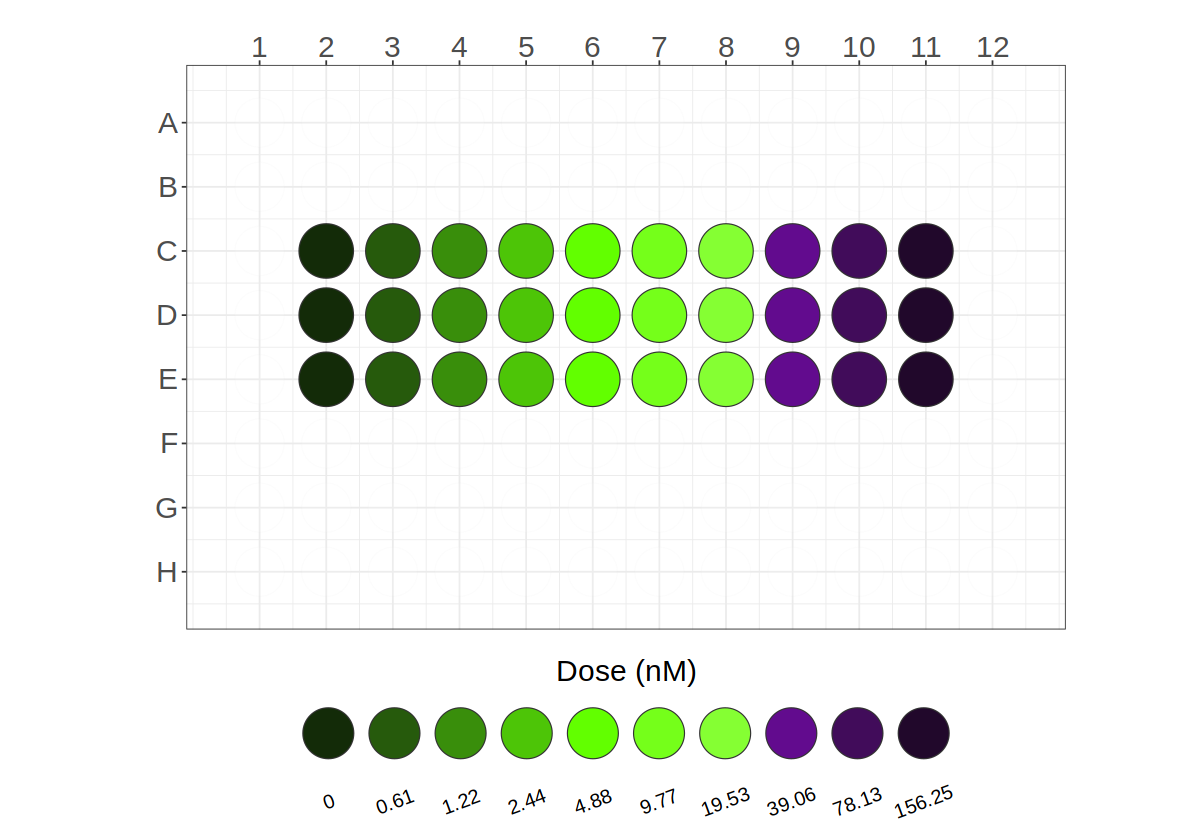

In [4]:
width <- 10
height <- 7
options(repr.plot.width = width, repr.plot.height = height)
platemap <- (
    platetools::raw_map(
        data = data$dose,
        well = data$well,
        plate = 96,
        size = 15
    )
    + scale_fill_manual(values = color_palette)
    # change legend title
    + labs(fill = "Dose (nM)")
    # change text size
    + theme(axis.text.x = element_text(size = 18))
    + theme(axis.text.y = element_text(size = 18))
    + theme(legend.text = element_text(size = 18))
    + theme(legend.title = element_text(size = 18, hjust = 0.5))
    # move legend to bottom
    + theme(
        legend.position = "bottom",
    )
    + guides(
        fill = guide_legend(
            nrow = 1,
            byrow = TRUE,
            title.position = "top",
            label.position = "bottom",
            title.hjust = 0.5,
            # rotate the text 
            label.theme = element_text(angle = 20, hjust = 0.5, vjust = 0.5),
            # change the size of the dots in the legend
            override.aes = list(size = 14)
        )
    )
)
platemap
# save plot
ggsave(figure_file, platemap, width = width, height = height, units = "in")